<a href="https://colab.research.google.com/github/head1ton/006_Medical_Analysis/blob/main/notebook/DICOM_%2B_NIfTI_Sample_Create.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 필수 라이브러리 설치
!pip install pydicom nibabel opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.2 MB/s eta 0:00:00


In [4]:
# 📁 라이브러리 임포트
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pydicom
from pydicom.dataset import FileDataset
import datetime
import nibabel as nib
import os

# 📌 DICOM 생성 함수
def create_sample_dicom(output_path="sample_xray.dcm"):
    img = np.zeros((256, 256), dtype=np.uint16)
    cv2.circle(img, (128, 128), 80, (40000,), thickness=-1)

    file_meta = pydicom.Dataset()
    file_meta.MediaStorageSOPClassUID = pydicom.uid.generate_uid()
    file_meta.MediaStorageSOPInstanceUID = pydicom.uid.generate_uid()
    file_meta.ImplementationClassUID = pydicom.uid.generate_uid()

    # 📌 TransferSyntaxUID 추가
    file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian  # 또는 다른 적절한 UID

    ds = FileDataset(output_path, {}, file_meta=file_meta, preamble=b"\0" * 128)
    ds.PatientName = "Test^XRay"
    ds.PatientID = "123456"
    ds.Modality = "CR"
    ds.ContentDate = str(datetime.date.today()).replace("-", "")
    ds.ContentTime = str(datetime.datetime.now().time()).replace(":", "").split(".")[0]
    ds.Rows, ds.Columns = img.shape
    ds.SamplesPerPixel = 1
    ds.PhotometricInterpretation = "MONOCHROME2"
    ds.BitsStored = 16
    ds.BitsAllocated = 16
    ds.HighBit = 15
    ds.PixelRepresentation = 0
    ds.PixelData = img.tobytes()
    ds.save_as(output_path)

# 📌 NIfTI 생성 함수
def create_sample_nifti(output_path="sample_mri.nii.gz"):
    img = np.zeros((128, 128, 64), dtype=np.float32)
    img[30:90, 30:90, 30:40] = 1.0
    affine = np.eye(4)
    nib_img = nib.Nifti1Image(img, affine)
    nib.save(nib_img, output_path)

# 📂 샘플 생성
create_sample_dicom("sample_xray.dcm")
create_sample_nifti("sample_mri.nii.gz")


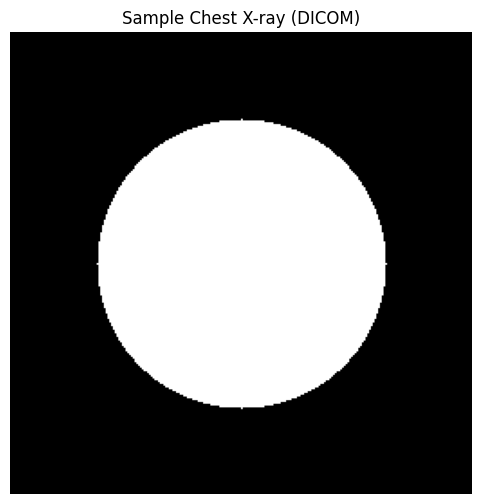

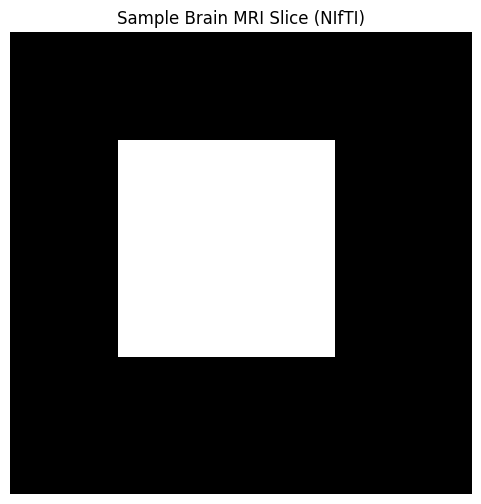

In [5]:
# ✅ DICOM 시각화
dicom = pydicom.dcmread("sample_xray.dcm")
dicom_img = dicom.pixel_array

plt.figure(figsize=(6, 6))
plt.title("Sample Chest X-ray (DICOM)")
plt.imshow(dicom_img, cmap="gray")
plt.axis("off")
plt.show()

# ✅ NIfTI 시각화 (중간 슬라이스)
nifti = nib.load("sample_mri.nii.gz")
nifti_data = nifti.get_fdata()
mid_slice = nifti_data.shape[2] // 2

plt.figure(figsize=(6, 6))
plt.title("Sample Brain MRI Slice (NIfTI)")
plt.imshow(nifti_data[:, :, mid_slice], cmap="gray")
plt.axis("off")
plt.show()